# Mass Calculator for Fonts

- Area calculation (Stokes Theorem)
$$S=\iint dS=\oint y \,dx=-\oint x \,dy=\sum_i\int_0^1 x_i'(t)y_i(t) \,dt=-\sum_i\int_0^1 x_i(t)y_i'(t) \,dt$$
$$\iint x\,dS=\oint xy \,dx=-\oint \frac{x^2}{2} \,dy$$
- Intersection:
$$\frac{x-x_0}{y-y_0}=\frac{x_1-x_0}{y_1-y_0}\Rightarrow[y(t)-y_0](x_1-x_2)-[x(t)-x_0](y_1-y_0)=0$$


In [1]:
%reset
def X(t,X0,X1,X2,X3): return (1 - t)**3*X0 + 3*t*(1 - t)**2*X1 + 3*t**2*(1 - t)*X2 + t**3*X3
def Y(t,Y0,Y1,Y2,Y3): return (1 - t)**3*Y0 + 3*t*(1 - t)**2*Y1 + 3*t**2*(1 - t)*Y2 + t**3*Y3
def XDY(t,X0,Y0,X1,Y1,X2,Y2,X3,Y3): 
    return -3*(t*X0*(Y0 - Y1) + (1/2)*t**2*(3*X1*(Y0 - Y1) + X0*(-5*Y0 + 7*Y1 - 2*Y2))
                + (1/3)*t**3*(3*X2*(Y0 - Y1) - 6*X1*(2*Y0 - 3*Y1 + Y2) 
                + X0*(10*Y0 - 18*Y1 + 9*Y2 - Y3))
                + (1/6)*t**6*(-X0 + 3*X1 - 3*X2 + X3)*(Y0 - 3*Y1 + 3*Y2 - Y3) 
                + (1/5)*t**5*(9*X2*Y0 - 2*X3*Y0 - 21*X2*Y1 + 4*X3*Y1 + 15*X2*Y2 - 2*X3*Y2 
                + X0*(5*Y0 - 13*Y1 + 11*Y2 - 3*Y3) - 3*X2*Y3 + 6*X1*(-2*Y0 + 5*Y1 - 4*Y2 + Y3)) 
                + (1/4)*t**4*(-9*X2*Y0 + X3*Y0 + 15*X2*Y1 - X3*Y1 - 6*X2*Y2 
                + 3*X1*(6*Y0 - 12*Y1 + 7*Y2 - Y3) + X0*(-10*Y0 + 22*Y1 - 15*Y2 + 3*Y3)))
def YDX(t,X0,Y0,X1,Y1,X2,Y2,X3,Y3): 
    return -3*(t*(X0 - X1)*Y0 - (1/2)*t**2*(5*X0*Y0 - 7*X1*Y0 + 2*X2*Y0 - 3*X0*Y1 + 3*X1*Y1)
            + (1/3)*t**3*(10*X0*Y0 + 9*X2*Y0 - X3*Y0 - 6*X2*Y1 - 3*X1*(6*Y0 - 6*Y1 + Y2)
            + 3*X0*(-4*Y1 + Y2)) + (1/6)*t**6*(-X0 + 3*X1 - 3*X2 + X3)*(Y0 - 3*Y1 + 3*Y2 - Y3)
            - (1/4)*t**4*(3*(5*X2*Y0 - X3*Y0 - 7*X2*Y1 + X3*Y1 + 2*X2*Y2) 
            + X0*(10*Y0 - 18*Y1 + 9*Y2 - Y3) + X1*(-22*Y0 + 36*Y1 - 15*Y2 + Y3)) 
            + (1/5)*t**5*(11*X2*Y0 - 3*X3*Y0 - 24*X2*Y1 + 6*X3*Y1 + 15*X2*Y2 - 3*X3*Y2 
            + X0*(5*Y0 - 12*Y1 + 9*Y2 - 2*Y3) - 2*X2*Y3 + X1*(-13*Y0 + 30*Y1 - 21*Y2 + 4*Y3)))
def getCOEF(X0,Y0,X1,Y1,X2,Y2,X3,Y3,x0,y0,x1,y1):
    return [(-x0 + x1)*Y0 - X0*(-y0 + y1) + 3*X1*(-y0 + y1) - 3*X2*(-y0 + y1) 
            + X3*(-y0 + y1) + 3*(x0 - x1)*Y1 - 3*(x0 - x1)*Y2 + (x0 - x1)*Y3
            , 3*(x0 - x1)*Y0 + 3*X0*(-y0 + y1) - 6*X1*(-y0 + y1) + 3*X2*(-y0 + y1)
            - 6*(x0 - x1)*Y1 + 3*(x0 - x1)*Y2
            , -3*(x0 - x1)*Y0 - 3*X0*(-y0 + y1) + 3*X1*(-y0 + y1) + 3*(x0 - x1)*Y1
            ,(-(x0 - x1))*y0 + (x0 - x1)*Y0 - x0*(-y0 + y1) + X0*(-y0 + y1)
           ]
def XDYL(t,x0,y0,x1,y1): return (1/2)*t*((-2 + t)*x0 - t*x1)*(y0 - y1)
def YDXL(t,x0,y0,x1,y1): return (1/2)*t*(x0 - x1)*((-2 + t)*y0 - t*y1)
def XYDX(t,X0,Y0,X1,Y1,X2,Y2,X3,Y3):
    return -3*(t*X0*(X0 - X1)*Y0 - (1/2)*t**2*(3*X1**2*Y0 + X0**2*(8*Y0 - 3*Y1) 
        + X0*(-13*X1*Y0 + 2*X2*Y0 + 3*X1*Y1)) + (1/3)*t**3*(9*X1*(3*X1*Y0 - X2*Y0 - X1*Y1) 
        - X0*(X3*Y0 + 6*X2*(-3*Y0 + Y1) + 3*X1*(21*Y0 - 12*Y1 + Y2)) 
        + X0**2*(28*Y0 + 3*(-7*Y1 + Y2))) + (1/5)*t**5*(2*X1*X3*(11*Y0 - 6*Y1) 
        + X2*(33*X2*Y0 - 5*X3*Y0 - 18*X2*Y1) - 9*X1*X2*(20*Y0 + 3*(-6*Y1 + Y2)) 
        + X0*(X3*(-20*Y0 + 18*Y1 - 3*Y2) - 5*X1*(49*Y0 - 66*Y1 + 24*Y2 - 2*Y3) 
        + 2*X2*(65*Y0 - 75*Y1 + 21*Y2 - Y3)) + 5*X0**2*(14*Y0 - 21*Y1 + 9*Y2 - Y3)
        + 3*X1**2*(65*Y0 - 75*Y1 + 21*Y2 - Y3))
        + (1/9)*t**9*(X0 - 3*X1 + 3*X2 - X3)**2*(Y0 - 3*Y1 + 3*Y2 - Y3)
        - (1/8)*t**8*(X0 - 3*X1 + 3*X2 - X3)*(14*X2*Y0 - 3*X3*Y0 - 33*X2*Y1 
        + 6*X3*Y1 + 24*X2*Y2 - 3*X3*Y2 + X0*(8*Y0 - 21*Y1 + 18*Y2 - 5*Y3) - 5*X2*Y3
        + X1*(-19*Y0 + 48*Y1 - 39*Y2 + 10*Y3)) - (1/4)*t**4*(6*X2**2*Y0 + X1*(-63*X2*Y0 
        + 4*X3*Y0 + 27*X2*Y1) + 9*X1**2*(11*Y0 - 8*Y1 + Y2) + X0**2*(56*Y0 - 63*Y1 + 18*Y2 - Y3) 
        + X0*(-7*X3*Y0 + 3*X3*Y1 + 6*X2*(11*Y0 - 8*Y1 + Y2) + X1*(-161*Y0 + 153*Y1 - 33*Y2 + Y3))) 
        - (1/6)*t**6*(72*X2**2*Y0 - 21*X2*X3*Y0 + X3**2*Y0 - 81*X2**2*Y1 + 15*X2*X3*Y1 + 18*X2**2*Y2
        + 6*X1*X3*(8*Y0 - 9*Y1 + 2*Y2) + X0**2*(56*Y0 - 105*Y1 + 60*Y2 - 10*Y3) 
        - 9*X1*X2*(30*Y0 - 42*Y1 + 15*Y2 - Y3) + X0*(-3*X1*(77*Y0 - 135*Y1 + 70*Y2 - 10*Y3)
        + 6*X2*(25*Y0 - 40*Y1 + 18*Y2 - 2*Y3) + X3*(-30*Y0 + 42*Y1 - 15*Y2 + Y3))
        + 9*X1**2*(25*Y0 - 2*(20*Y1 - 9*Y2 + Y3))) + (1/7)*t**7*(3*X3**2*(Y0 - Y1) 
        - 3*X2*X3*(11*Y0 - 16*Y1 + 5*Y2) + X0**2*(28*Y0 - 63*Y1 + 45*Y2 - 10*Y3)
        + 9*X1**2*(17*Y0 - 35*Y1 + 22*Y2 - 4*Y3) - 9*X1*X2*(25*Y0 - 48*Y1 + 27*Y2 - 4*Y3) 
        + 3*X2**2*(26*Y0 - 45*Y1 + 21*Y2 - 2*Y3) + 2*X1*X3*(26*Y0 - 45*Y1 + 21*Y2 - 2*Y3) 
        + X0*(6*X2*(17*Y0 - 35*Y1 + 22*Y2 - 4*Y3) + X3*(-25*Y0 + 48*Y1 - 27*Y2 + 4*Y3) 
        + X1*(-133*Y0 + 288*Y1 - 195*Y2 + 40*Y3))))
def XYDXL(t,x0,y0,x1,y1): 
    return (1/6)*t*(-x0 + x1)*(6*x0*y0 + 2*t**2*(x0 - x1)*(y0 - y1) + 3*t*(x1*y0 + x0*(-2*y0 + y1)))
def SL(xx1,yy1,xx2,yy2,XX1,YY1,XX2,YY2):
    k=(-(XX1 - XX2))*(yy1 - yy2) + (xx1 - xx2)*(YY1 - YY2)
    if(k==0): return []
    else:
        return np.array([xx2*XX2*(yy1 - YY1) + xx1*XX2*(YY1 - yy2) 
                         + xx1*XX1*(yy2 - YY2) + XX1*xx2*(-yy1 + YY2)
                         ,
                        XX2*YY1*(yy1 - yy2) + xx1*YY1*yy2 - XX1*yy1*YY2 
                         - xx1*yy2*YY2 + XX1*yy2*YY2 + xx2*yy1*(-YY1 + YY2)
                        ])/k
def hXXDY(t,X0,Y0,X1,Y1,X2,Y2,X3,Y3):
    return (-(3/2))*(t*X0**2*(Y0 - Y1) - t**2*X0*(3*X1*(-Y0 + Y1) + X0*(4*Y0 - 5*Y1 + Y2)) 
            +(1/3)*t**3*(9*X1**2*(Y0 - Y1) + 6*X0*(X2*(Y0 - Y1) + X1*(-7*Y0 + 9*Y1 - 2*Y2))
             + X0**2*(28*Y0 - 42*Y1 + 15*Y2 - Y3)) + (1/9)*t**9*(X0 
            - 3*X1 + 3*X2 - X3)**2*(Y0 - 3*Y1 + 3*Y2 - Y3)
             -  (1/4)*t**8*(X0 - 3*X1 + 3*X2 - X3)*(6*X2*Y0 - X3*Y0 - 15*X2*Y1 + 2*X3*Y1 + 12*X2*Y2 - X3*Y2 
            + X0*(4*Y0 - 11*Y1 + 10*Y2 - 3*Y3) - 3*X1*(3*Y0 - 8*Y1 + 7*Y2 - 2*Y3) - 
                 3*X2*Y3) - (1/3)*t**6*(3*X2*X3*(-Y0 + Y1) + 9*X2**2*(2*Y0 - 3*Y1 + Y2) 
            + 6*X1*X3*(2*Y0 - 3*Y1 + Y2) + X0**2*(28*Y0 - 63*Y1 + 45*Y2 - 10*Y3) - 
                 15*X0*X1*(7*Y0 - 15*Y1 + 10*Y2 - 2*Y3) + 18*X1**2*(5*Y0 - 10*Y1 + 6*Y2 - Y3) 
            + 12*X0*X2*(5*Y0 - 10*Y1 + 6*Y2 - Y3) + 9*X1*X2*(-10*Y0 + 18*Y1 - 9*Y2 + Y3) + 
                 X0*X3*(-10*Y0 + 18*Y1 - 9*Y2 + Y3)) + (1/7)*t**7*(54*X2**2*Y0 - 18*X2*X3*Y0 
            + X3**2*Y0 - 108*X2**2*Y1 + 30*X2*X3*Y1 - X3**2*Y1 + 63*X2**2*Y2 - 12*X2*X3*Y2 - 
                 2*X0*(3*X1*(21*Y0 - 51*Y1 + 40*Y2 - 10*Y3) - 3*X2*(15*Y0 - 35*Y1 + 26*Y2 - 6*Y3) 
            + X3*(10*Y0 - 22*Y1 + 15*Y2 - 3*Y3)) + X0**2*(28*Y0 - 70*Y1 + 57*Y2 - 15*Y3) 
            + 9*X1**2*(15*Y0 - 35*Y1 + 26*Y2 - 6*Y3) - 9*X2**2*Y3 - 6*X1*(X2*(30*Y0 - 66*Y1 + 45*Y2 - 9*Y3) 
            + X3*(-6*Y0 + 12*Y1 - 7*Y2 + Y3))) - (1/2)*t**4*(9*X1*(X2*(-Y0 + Y1) + X1*(3*Y0 - 4*Y1 + Y2)) 
            + X0**2*(28*Y0 - 49*Y1 + 24*Y2 - 3*Y3) + X0*(X3*(-Y0 + Y1) + 6*X2*(3*Y0 - 4*Y1 + Y2) 
            + X1*(-63*Y0 + 99*Y1 - 39*Y2 + 3*Y3))) +  (1/5)*t**5*(9*X2**2*(Y0 - Y1) - 6*X1*(X3*(-Y0 + Y1) 
            + 3*X2*(5*Y0 - 7*Y1 + 2*Y2)) + 5*X0**2*(14*Y0 - 28*Y1 + 17*Y2 - 3*Y3) 
            + 9*X1**2*(15*Y0 - 25*Y1 + 11*Y2 - Y3) 
            - 2*X0*(X3*(5*Y0 - 7*Y1 + 2*Y2) + 15*X1*(7*Y0 - 13*Y1 + 7*Y2 - Y3) 
            + X2*(-45*Y0 + 75*Y1 - 33*Y2 + 3*Y3))))
def hXXDYL(t,x0,y0,x1,y1): 
    return (-(1/6))*t*(3*x0**2 - 3*t*x0**2 + t**2*x0**2 + 3*t*x0*x1 - 2*t**2*x0*x1 + t**2*x1**2)*(y0 - y1)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Common Func    
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
from scipy.optimize import fsolve, fmin
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def Strp2cod():
    global cod,cmd,typ,xmin,xmax,ymin,ymax
    cod=[]
    cmd=[]
    typ=[]
    codsts=0
    codtmp=0.0
    lth=len(strp)
    i_s=i_e=0
    while (i_e<lth):
        i_s=i_e
        while (strp[i_e]!=" " and strp[i_e]!="\n"):
            i_e+=1
        if(strp[i_s]=="m"): #move to
            codsts=3
            cmd=cmd+[Path.MOVETO]
        elif(strp[i_s]=="l"): #line to
            codsts=3
            cmd=cmd+[Path.LINETO]
        elif(strp[i_s]=="c"): #curve to
            codsts=3
            cmd=cmd+[Path.CURVE4, Path.CURVE4, Path.CURVE4]
        elif(codsts==0): #not pairing
            codtmp=float(strp[i_s:i_e])
            codsts=1
        elif(codsts==1): #pairing
            cod=cod+[np.array([codtmp,float(strp[i_s:i_e])])]
            codsts=0
        elif(codsts==3): #add type
            codsts=0
            typ=typ+[strp[i_s:i_e]]
        while (i_e<lth and (strp[i_e]==" " or strp[i_e]=="\n")):
            i_e+=1
    xmin=10000
    xmax=-10000
    ymin=10000
    ymax=-10000
    for i_ in range(len(cmd)):
        if(cod[i_][0]<xmin):
            xmin=cod[i_][0]
        elif(cod[i_][0]>xmax):
            xmax=cod[i_][0]
        if(cod[i_][1]<ymin):
            ymin=cod[i_][1]
        elif(cod[i_][1]>ymax):
            ymax=cod[i_][1]
    return xmin
            
def PlotGlyph(grd):
    global cod
    path = Path(cod, cmd)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    patch = patches.PathPatch(path, facecolor='black', lw=2)
    ax.add_patch(patch)
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)
    ax.set_aspect('equal')
    if(grd):
        ax.set_xticks(np.arange(np.round(xmin,decimals=-2),xmax,50), minor=True)
        ax.set_yticks(np.arange(np.round(ymin,decimals=-2),ymax,50), minor=True)
        ax.grid(which='both')
    plt.show()

def ReadGlyph(g_fname): #extract to strp
    global strp
    hfile = open(g_fname)
    lnstr=hfile.readline()
    #Move to SplineSet
    while (lnstr[:9]!="SplineSet"):
        lnstr=hfile.readline()
        if (lnstr[:5]=="Width"):
            gwd=float(lnstr[7:])
        elif(lnstr==""): return -10000
    lnstr=hfile.readline()
    strp=''
    while (lnstr[:12]!="EndSplineSet"):
        strp=strp+lnstr
        lnstr=hfile.readline()
    hfile.close()
    return gwd

In [3]:
def Area():
    n=len(cod)
    itr=0
    ss=0
    while(itr<n):
        if(cmd[itr]==Path.MOVETO):
            itr+=1;
        elif(cmd[itr]==Path.CURVE4):
            ss+=(YDX(1.0,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1])
                -YDX(0.0,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1])
                )
            itr+=3
        elif(cmd[itr]==Path.LINETO):
            ss+=(YDXL(1.0,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1])
                -YDXL(0.0,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1])
                )
            itr+=1
    return ss

def XdS():
    n=len(cod)
    itr=0
    ss=0
    while(itr<n):
        if(cmd[itr]==Path.MOVETO):
            itr+=1;
        elif(cmd[itr]==Path.CURVE4):
            ss+=(XYDX(1.0,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1])
                -XYDX(0.0,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1])
                )
            itr+=3
        elif(cmd[itr]==Path.LINETO):
            ss+=(XYDXL(1.0,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1])
                -XYDXL(0.0,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1])
                )
            itr+=1
    return ss

In [4]:
import numpy as np
def FdInts(xx1,yy1,xx2,yy2):
    n=len(cod)
    itr=0
    rts=np.array([[0.0,0.0]])
    while(itr<n):
        if(cmd[itr]==Path.MOVETO):
            itr+=1;
        elif(cmd[itr]==Path.CURVE4):
            coeff=getCOEF(cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1],xx1,yy1,xx2,yy2)
            root=np.roots(coeff)
            root=np.real(root[np.isreal(root)])
            root=root[(root>0)&(root<1)]
            for rooti in root:
                rts=np.concatenate((rts,[[
                X(rooti,cod[itr-1][0],cod[itr][0],cod[itr+1][0],cod[itr+2][0]),
                Y(rooti,cod[itr-1][1],cod[itr][1],cod[itr+1][1],cod[itr+2][1])
                ]]))
            itr+=3
        elif(cmd[itr]==Path.LINETO):
            root=SL(xx1,yy1,xx2,yy2,cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1])
            if(len(root)!=0 and
               ((root[1]-cod[itr-1][1])*(root[1]-cod[itr][1])<0 
                or (root[0]-cod[itr-1][0])*(root[0]-cod[itr][0])<0)):
                rts=np.concatenate((rts,np.array([root])))
            itr+=1
    return rts[1:]

In [5]:
def AreaAbove(yminn):
    n=len(cod)
    itr=0
    ss=0
    while(itr<n):
        if(cmd[itr]==Path.MOVETO):
            itr+=1;
        elif(cmd[itr]==Path.CURVE4):
            # find root
            coeff=getCOEF(cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1],0,yminn,1,yminn)
            root=np.roots(coeff)
            root=np.real(root[np.isreal(root)])
            root=np.concatenate(([0],np.sort(root[(root>0)&(root<1)]),[1]))
            
            npts=len(root)-1
            
            for ri in range(npts):
                if(Y((root[ri]+root[ri+1])/2,
                     cod[itr-1][1],cod[itr][1],cod[itr+1][1],cod[itr+2][1])>yminn):
                    ss+=(XDY(root[ri],cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1])
                    -XDY(root[ri+1],cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1])
                    )
            itr+=3
            
        elif(cmd[itr]==Path.LINETO):
            if(cod[itr-1][1]!=cod[itr][1]):
                root=np.array([(cod[itr-1][1]-yminn)/(cod[itr-1][1]-cod[itr][1])])
                root=np.concatenate(([0],np.sort(root[(root>0)&(root<1)]),[1]))
                
                npts=len(root)-1            
                for ri in range(npts):
                    if(cod[itr-1][1]+(root[ri]+root[ri+1])/2
                         *(cod[itr][1]-cod[itr-1][1])>yminn):
                        ss+=(XDYL(root[ri],cod[itr-1][0],cod[itr-1][1],
                                cod[itr][0],cod[itr][1])
                                -XDYL(root[ri+1],cod[itr-1][0],cod[itr-1][1],
                                 cod[itr][0],cod[itr][1])
                            )
            itr+=1
    return ss

def XdSAbove(yminn):
    n=len(cod)
    itr=0
    ss=0
    while(itr<n):
        if(cmd[itr]==Path.MOVETO):
            itr+=1;
        elif(cmd[itr]==Path.CURVE4):
            # find root
            coeff=getCOEF(cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1],0,yminn,1,yminn)
            root=np.roots(coeff)
            root=np.real(root[np.isreal(root)])
            root=np.concatenate(([0],np.sort(root[(root>0)&(root<1)]),[1]))
            
            npts=len(root)-1
            
            for ri in range(npts):
                if(Y((root[ri]+root[ri+1])/2,
                     cod[itr-1][1],cod[itr][1],cod[itr+1][1],cod[itr+2][1])>yminn):
                    ss+=(hXXDY(root[ri],cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1])
                    -hXXDY(root[ri+1],cod[itr-1][0],cod[itr-1][1],
                     cod[itr][0],cod[itr][1],
                     cod[itr+1][0],cod[itr+1][1],
                     cod[itr+2][0],cod[itr+2][1])
                    )
            itr+=3
            
        elif(cmd[itr]==Path.LINETO):
            if(cod[itr-1][1]!=cod[itr][1]):
                root=np.array([(cod[itr-1][1]-yminn)/(cod[itr-1][1]-cod[itr][1])])
                root=np.concatenate(([0],np.sort(root[(root>0)&(root<1)]),[1]))
                
                npts=len(root)-1            
                for ri in range(npts):
                    if(cod[itr-1][1]+(root[ri]+root[ri+1])/2
                         *(cod[itr][1]-cod[itr-1][1])>yminn):
                        ss+=(hXXDYL(root[ri],cod[itr-1][0],cod[itr-1][1],
                                cod[itr][0],cod[itr][1])
                                -hXXDYL(root[ri+1],cod[itr-1][0],cod[itr-1][1],
                                 cod[itr][0],cod[itr][1])
                            )
            itr+=1
    return ss

In [6]:
def sweep(sbx,spi):
    xx=xmax+1
    spib=sbxb=10001
    while(xx>xmin):
        rooot=np.sort(np.transpose(FdInts(xx,0.0,xx,10.0))[1])
        if(len(rooot)>0):
            if(spib>10000 and rooot[-1]>spi):
                spib=xx
            if(sbxb>10000 and rooot[0]<sbx):
                sbxb=xx
            if(spib<10000 and sbxb<10000):
                break
        xx-=1
#     print(sbxb,spib)
    return(sbxb,spib)

In [7]:
def TopAccH(srto):
    yy=ymax+1.26936
    sr=srto*Area()
    while(yy>ymin):
        sg=AreaAbove(yy)
        if(sg>sr): break
        yy-=1
    op=np.sort(np.transpose(FdInts(0,yy,1,yy))[0])
    if(len(op)>2 or op[-1]-op[0]>150):
        return (op[-1]+op[0])/2
    else:
        return XdSAbove(yy)/sg

In [8]:
def findLim(dx,side):
    if(dx<-.01):
        print("dx<0 is not allowed")
        return 0
    if(side=="r"):
        xx=xmax+1
        while(xx>xmin):
            rooot=FdInts(xx,ymin,xx+dx,ymin+100)
            if(len(rooot)>0):
                return xx-ymin/100*dx
            xx-=1
    elif(side=="l"):
        xx=xmin-1
        while(xx<xmax):
            rooot=FdInts(xx,ymax,xx-dx,ymax-100)
            if(len(rooot)>0):
                return xx-ymax/100*dx
            xx+=1
    else:
        print("wrong side")
        return 0
    
def findLimRv(dx,ud):
    if(dx<-.01):
        print("dx<0 is not allowed")
        return 0
    xx=xmax
    while(xx>xmin):
        rooot=FdInts(xx,ymax,xx-dx,ymax-100)
        if(len(rooot)>0 and min(np.transpose(rooot)[1])<ud):
            return xx-ymax/100*dx
        xx-=1
    return 0

In [9]:
dxm=50
dxm2=350
def limfunc(dx,lim):
    if(dx<dxm): return 4*lim*dx
    elif (dx<dxm2): return lim*(dx+3*dxm)
    else : return lim*(3*dxm+dxm2)
    
def WeightWindow(yy):
    if(yy<500 and yy>50): return 3
    else: return 1  
    
def GeometryCorr(lim=.7):
#     global BottomRightVertex, TopRightVertex, TopLeftVertex, BottomLeftVertex
    Xmx=np.array([], dtype=float)
    Xmn=np.array([], dtype=float)
    WT=np.array([], dtype=float)
    itrrr=np.arange(max(ymin+.0015230,-80.9),ymax)
    for itrtiri in itrrr:
        rst=np.transpose(FdInts(0,itrtiri,10,itrtiri))[0]
        WT=np.concatenate((WT,[WeightWindow(itrtiri)]))
        if(len(rst)>0):
            Xmx=np.concatenate((Xmx,[max(rst)]))
            Xmn=np.concatenate((Xmn,[min(rst)]))
        else:
            Xmx=np.concatenate((Xmx,[-100]))
            Xmn=np.concatenate((Xmn,[400]))
    Xmx2=Xmx.copy()
    Xmn2=Xmn.copy()
    lthh=len(Xmx)
#     for itrtiri in range(lthh-1):
#         if (Xmx[itrtiri]-Xmx[itrtiri+1]>lim):
#             Xmx[itrtiri+1]=Xmx[itrtiri]-lim
#         if (-Xmn[itrtiri]+Xmn[itrtiri+1]>lim):
#             Xmn[itrtiri+1]=Xmn[itrtiri]+lim   
#     for itrtiri in range(lthh-1):
#         if (Xmx[lthh-1-itrtiri]-Xmx[lthh-itrtiri-2]>lim):
#             Xmx[lthh-itrtiri-2]=Xmx[lthh-1-itrtiri]-lim
#         if (-Xmn[lthh-1-itrtiri]+Xmn[lthh-itrtiri-2]>lim):
#             Xmn[lthh-itrtiri-2]=Xmn[lthh-1-itrtiri]+lim  
    for itrtiri in range(lthh):
        for itrtirj in range(lthh):
            klim=limfunc(abs(itrtiri-itrtirj),lim)
            Xmx[itrtiri]=max(Xmx[itrtiri],Xmx2[itrtirj]-klim)
            Xmn[itrtiri]=min(Xmn[itrtiri],Xmn2[itrtirj]+klim)
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.plot(Xmx2,"-",
#             Xmx,"-",
#             Xmn2,"-",
#             Xmn,"-"
#            )
    corr0=-(itrrr[0]-itrrr[-1])*lim/2
    wtm=np.average(WT)
    tmpr=np.array([corr0-(xmax-np.average(Xmx*WT)/wtm),corr0+xmin-np.average(Xmn*WT)/wtm])
    
#     Make mkern vertex
#     TopRightVertex=np.array([[2.1,3.1]])
#     TopLeftVertex=np.array([[2.1,3.1]])
#     mklim=20
    
#     Currentval=Xmx[0]
#     BottomRightVertex=np.array([[itrrr[0],Xmx[0]]])
#     for itrtiri in range(lthh):
#         if(itrrr[itrtiri]>SubscriptTopMax): break
#         Currentval=max(Xmx[itrtiri],Currentval)
#         if(Currentval-BottomRightVertex[-1,1]>mklim):
#             BottomRightVertex=np.concatenate((BottomRightVertex,[[itrrr[itrtiri],Xmx[itrtiri]]]))
#     BottomLeftVertex=np.array([[2.1,3.1]])
    
    return((np.sign(tmpr)*(1-np.exp(-np.abs(tmpr)/130))*130))

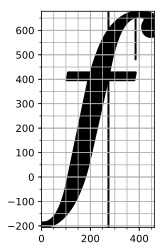

In [97]:
# ReadGlyph(dirrrx+"/"+"_L.glyph")
# Strp2cod()
# PlotGlyph(1)
# print(Diffract())
# ReadGlyph(dirrrx+"/"+"u1D43_F.glyph")
# ReadGlyph(dirrrx+"/"+"_L.glyph")
Strp2cod()
# PlotGlyph(1)
# dxm=50
# dxm2=350
dxm=22
dxm2=190
Make(dirrrx+"/"+"u1D453.glyph",0,450,1)


# ReadGlyph(dirrrx+"/"+"u1D43_F.glyph")
# Strp2cod()
# # PlotGlyph(1)
# dxm=40
# dxm2=350
# print(Diffract(900,5))

# ReadGlyph(dirrrx+"/"+"u1D457.glyph")
# Strp2cod()
# # PlotGlyph(1)
# dxm=30
# dxm2=190
# print(Diffract(440,5))

# ReadGlyph(dirrrx+"/"+"_L.glyph")
# # ReadGlyph(dirrrx+"/"+"_L.glyph")
# # ReadGlyph(dirrrx+"/"+"_Z.glyph")
# Strp2cod()
# # PlotGlyph(1)
# dxm=40
# print(Diffract(900,5))

In [98]:
def Diffract(hilim=900,blklim=100):
    lolim=-100.9
    diff_max=3
    dif_wt=.025
    pen_length=400
    cut_length=25
    msk=np.arange(max(ymin+1.0015230,lolim),min(ymax-1.0015230,hilim))
    zz=msk.copy()
    llth=len(msk)
    slope=.32
    
    limX=np.zeros(llth)+xmax
    limM=np.zeros(llth)+xmin
    
    
    dval=np.zeros(llth)
    val=np.zeros(llth)+1.0
    
    xx_current=xmax+.9926
    rightBlim=10000.0
    nHoldr=-1
    for itr in range(pen_length):
        xx_current-=1
        rst=np.transpose(FdInts(xx_current,0,xx_current,100))[1]
        rst=np.sort(rst)  
        lresult=len(rst)
#         if(lresult>0):
#             print(xx_current, rst[-1])
#         else:
#             print(xx_current)
        if(lresult>0 and rst[-1]>lolim and rightBlim>9999):
            rightBlim=xx_current
#         blacklth=0
#         for idx in range((int)(lresult/2)):
#             blacklth+=((int)(rst[2*idx+1])-(int)(rst[2*idx]))
        if(lresult>3):  
            for idx in range(llth):
                dval[idx]=0
                for idx1 in range(diff_max):
                    if(idx-idx1>=0):
                        dval[idx]+=(val[idx-idx1]*(diff_max-idx1))
                    if(idx+idx1<llth):
                        dval[idx]+=(val[idx+idx1]*(diff_max-idx1))
            for idx in range(cut_length):
                dval[idx]=dval[-1-idx]=0
            val+=dif_wt*dval
        
            nHoldr=abs(nHoldr)
        else:
            if(nHoldr<0):
                nHoldr-=1
        
        for idx in range((int)(lresult/2)):
            for idxx in range((int)(rst[2*idx+1])-(int)(rst[2*idx])):
                gitemp=idxx+(int)(rst[2*idx]-zz[0])
                if(gitemp>=0 and gitemp<llth):
                    val[gitemp]=0  
        
        for idx in range(llth):
            if(val[idx]>1):
                val[idx]=1
        limX-=val

    xx_current=xmin-.9926
    val=np.zeros(llth)+1.0
    leftBlim=-10000.0
    nHoldl=-1
    for itr in range(pen_length):
        xx_current+=1
        rst=np.transpose(FdInts(xx_current,0,xx_current,100))[1]
        rst=np.sort(rst)  
        lresult=len(rst)
        if(lresult>0 and rst[-1]>lolim and rst[0]<hilim and leftBlim<-9999):
            leftBlim=xx_current
#         blacklth=0
#         for idx in range((int)(lresult/2)):
#             blacklth+=((int)(rst[2*idx+1])-(int)(rst[2*idx]))
        if(lresult>3):  
            for idx in range(llth):
                dval[idx]=0
                for idx1 in range(diff_max):
                    if(idx-idx1>=0):
                        dval[idx]+=(val[idx-idx1]*(diff_max-idx1))
                    if(idx+idx1<llth):
                        dval[idx]+=(val[idx+idx1]*(diff_max-idx1))
            for idx in range(cut_length):
                dval[idx]=dval[-1-idx]=0
            val+=dif_wt*dval
    
            nHoldl=abs(nHoldl)
        else:
            if(nHoldl<0):
                nHoldl-=1
            
        for idx in range((int)(lresult/2)):
            for idxx in range((int)(rst[2*idx+1])-(int)(rst[2*idx])):
                gitemp=idxx+(int)(rst[2*idx]-zz[0])
                if(gitemp>=0 and gitemp<llth):
                    val[gitemp]=0   

        for idx in range(llth):
            if(val[idx]>1):
                    val[idx]=1
        limM+=val
    
    
#     #add reverse
#     for idx in range(llth):
#         limX[idx]=max(limX[idx],limX[llth-1-idx])
#         limM[idx]=min(limM[idx],limM[llth-1-idx])
    
    
    limX2=limX.copy()
    limM2=limM.copy()
    
    
    for itrtiri in range(llth):
        for itrtirj in range(llth):
            klim=limfunc(abs(itrtiri-itrtirj),slope)
            limX[itrtiri]=max(limX[itrtiri],limX2[itrtirj]-klim)
            limM[itrtiri]=min(limM[itrtiri],limM2[itrtirj]+klim)
        
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.set_aspect('equal')
#     ax.plot(limX,zz,"-",
#            limX2,zz,"-",
#             limM,zz,"-",
#            limM2,zz,"-"
#            )
    
    corr0=-(zz[0]-zz[-1])*slope/2
    if(rightBlim>9999):
        rightBlim=max(limX2)
    if(leftBlim<-9999):
        leftBlim=min(limM2)      
#     print(rightBlim, xmax)
    tmpr=[corr0-(max(limX2)-np.average(limX))
          +(rightBlim-xmax)+(max(limX2)-rightBlim)*.5
          ,corr0+min(limM2)-np.average(limM)
          +(xmin-leftBlim)-(min(limM2)-leftBlim)*.5
         ]
#     print(max(limX2),np.average(limX))
    return((np.sign(tmpr)*(1-np.exp(-np.abs(tmpr)/130))*130))

In [99]:
def Make(g_name,gap,hilim=440,plt=False,flm=False):
    global tah,icc,xmin,xmax,ymax,cod,cmd
    ReadGlyph(g_name)
    Strp2cod()
    
#     geocor=GeometryCorr()
    geocor=Diffract(hilim)

    
    tah=TopAccH(.1)
    icc0=sweep(60,0)
    icc=max(0,icc0[1]-icc0[0])
    icc=(1-np.exp(-icc/300))*300
#     tah=0
#     icc=0
    
#     COM=(XdS()/Area()+(xmax+xmin))/3
#     xr=xmax-COM
#     xl=COM-xmin
#     if(xr>xl): 
#         dxmin=2*COM-xmax-xmin
#         dxmax=0
#     else:
#         dxmax=2*COM-xmin-xmax
#         dxmin=0
    
#     ymax+=100
    
#     xmax+=max(geocor[0],dxmax)
#     if(geocor[1]<0):
#         xmin+=max(-geocor[1],dxmin)
#     else:
#         xmin+=min(-geocor[1],dxmin)
    xmax+=geocor[0]
    xmin-=geocor[1]
    
    xmax+=gap
    xmin-=gap
    
#     print(max(geocor[0],dxmax),min(-geocor[1],dxmin))
    
    if(flm):
        xmin=findLimRv(0,-287)
    if(plt): 
        cod=np.concatenate((cod,np.array([[tah,ymax-200],[tah,ymax],[xmax-icc,ymin],[xmax-icc,ymax]])))
        cmd+=[Path.MOVETO,Path.LINETO,Path.MOVETO,Path.LINETO]
        PlotGlyph(1)
        
def MakeFix(g_name):
    global tah,icc,xmin,xmax,ymax,cod,cmd
    ReadGlyph(dirrrx+"/"+g_name)
    gwd=Strp2cod()
        
    tah=TopAccH(.1)
    icc0=sweep(60,0)
    icc=max(0,icc0[1]-icc0[0])
    icc=(1-np.exp(-icc/300))*300
    [xmin0,xmax0]=[xmin,xmax]
    
    if(g_name[-8:]==".s.glyph"):
        refxmax1=ReadGlyph(dirrr+"/"+g_name[:-8]+".glyph")
        refxmin1=Strp2cod()
        refxmax2=ReadGlyph(dirrref+"/"+g_name[:-8]+".glyph")
        refxmin2=Strp2cod()
        refxmax1=refxmax1*.8+refxmax1*.2
        refxmin1=refxmin1*.8+refxmin1*.2    
        xmin=xmin0-refxmin1
        xmax=refxmax1
    elif(g_name[-9:]==".ss.glyph"):
        refxmax1=ReadGlyph(dirrr+"/"+g_name[:-9]+".glyph")
        refxmin1=Strp2cod()
        refxmax2=ReadGlyph(dirrref+"/"+g_name[:-9]+".glyph")
        refxmin2=Strp2cod()
        refxmax1=refxmax1*.6+refxmax1*.4
        refxmin1=refxmin1*.6+refxmin1*.4    
        xmin=xmin0-refxmin1
        xmax=refxmax1
    else:
        refxmax1=ReadGlyph(dirrr+"/"+g_name)
        refxmin1=Strp2cod()
        xmin=xmin0-refxmin1
        xmax=refxmax1

In [100]:
#Read Mathtable Const
hfile = open("../AuroraMath.sfdir/font.props")
lnstr="begin"
while (lnstr!=""):
    lnstr=hfile.readline()
    if (lnstr[5:27]=="ScriptPercentScaleDown"):
        ScriptPercentScaleDown=int(lnstr[29:])
    elif (lnstr[5:33]=="ScriptScriptPercentScaleDown"):
        ScriptScriptPercentScaleDown=int(lnstr[35:])
    elif (lnstr[5:23]=="SubscriptShiftDown"):
        SubscriptShiftDown=int(lnstr[25:])
    elif (lnstr[5:20]=="SubscriptTopMax"):
        SubscriptTopMax=int(lnstr[22:])
    elif (lnstr[5:29]=="SubscriptBaselineDropMin"):
        SubscriptBaselineDropMin=int(lnstr[31:])
    elif (lnstr[5:24]=="SuperscriptShiftUp:"):
        SuperscriptShiftUp=int(lnstr[25:])
    elif (lnstr[5:25]=="SuperscriptBottomMin"):
        SuperscriptBottomMin=int(lnstr[27:])
    elif (lnstr[5:31]=="SuperscriptBaselineDropMax"):
        SuperscriptBaselineDropMax=int(lnstr[33:])
        
print(ScriptPercentScaleDown,
      ScriptScriptPercentScaleDown,
      SubscriptShiftDown,
      SubscriptTopMax,
      SubscriptBaselineDropMin,
      SuperscriptShiftUp,
      SuperscriptBottomMin,
      SuperscriptBaselineDropMax
    )

70 50 0 450 0 0 450 0


In [101]:
import os

scrgap=90

def WriteGlyph(g_fname,g_wd,g_itacor,g_tpach,g_xmove):
    hfile = open(g_fname)
    lpstr=opr=hfile.readline()
    
    #Write Info
    while (lpstr[:9]!="SplineSet"):
        lpstr=hfile.readline()
        if(lpstr==""):
            return 0
        if (lpstr[:5]=="Width"):
            if(g_wd>-10):
                opr=opr+"Width: "+str(g_wd)+"\n"
            else:
                opr+=lpstr
            if(g_itacor!=0):
                opr=opr+"ItalicCorrection: "+str(g_itacor)+"\n"
            if(g_tpach!=0):
                opr=opr+"TopAccentHorizontal: "+str(g_tpach)+"\n"
    
#             mknlth=len(BottomRightVertex)
#             opr=opr+"BottomRightVertex: "+str(mknlth)+" "
#             for iit in range(mknlth):
#                 opr=opr+str(int(BottomRightVertex[iit,0]))+","+str(int(-xmax+g_itacor+scrgap+BottomRightVertex[iit,1]))+" "
#             opr=opr+"\n"
        
            continue
            
        if (lpstr[:16]!="ItalicCorrection" 
            and lpstr[:19]!="TopAccentHorizontal" 
#             and lpstr[:17]!="BottomRightVertex" 
#             and lpstr[:14]!="TopRightVertex"
#             and lpstr[:13]!="TopLeftVertex"
#             and lpstr[:16]!="BottomLeftVertex"
           ):
            opr+=lpstr
    # Move Spline
    lpstr=hfile.readline()
    while (lpstr[:12]!="EndSplineSet"):
        if(lpstr[0]==" "):
            i=1
            opr+=" "
        else:
            i=0
            opr+=""
        j=i
    
        adb=True
        while (True):
            j+=1
            if(lpstr[j]==" "):
                if(lpstr[i:j]!="c" and lpstr[i:j]!="m" and lpstr[i:j]!="l"):
                    temp=float(lpstr[i:j])
                    if adb:
                        temp+=g_xmove
                    adb=not adb
                    if(int(temp)==temp):
                        temp=int(temp)
                    opr=opr+str(temp)+" "
                else:
                    opr+=lpstr[i:]
                    break
                i=j+1
        lpstr=hfile.readline()
    
    opr=opr+lpstr+hfile.read()
    hfile.close()
    hfile=open(g_fname,"w")
    hfile.write(opr)
    hfile.close()
    
gap=0
dirrrx="../AuroraMath.sfdir"

In [104]:
gap=0
# [hlim,dxm,dxm2]=[450,22,190]
[hlim,dxm,dxm2]=[900,55,200]
dirrr="../temp/lettersnameU.sfdir"
# dirrr="../temp/fj.sfdir"
fnum=0
for path, subdirs, files in os.walk(dirrr):
    for filename in files:
        if(filename[-1]!="h"):
            continue
        fnum+=1
print(fnum)
cnum=0
for path, subdirs, files in os.walk(dirrr):
    for filename in files:
        if(filename[-1]!="h"):
            continue
        cnum+=1
        if((cnum % (int)(fnum/min(100,fnum)))==0): print("#",end="")
        if((cnum % (int)(fnum/min(5,fnum)))==0): print("")    
        Make(dirrrx+"/"+filename,gap,hlim)
        WriteGlyph(dirrrx+"/"+filename,(int)(xmax-xmin-icc),(int)(icc),int(tah-xmin),int(-xmin))
#         print(filename,xmin)
print("\nfinished")

52
##########
##########
##########
##########
##########
##
finished


In [ ]:
dirrr="../../gtemp/widthkeep.sfdir"
dirrref="../../gtemp/widthkeepSb.sfdir"
fnum=0
for path, subdirs, files in os.walk(dirrr):
    for filename in files:
        if(filename[-1]!="h"):
            continue
        fnum+=1
print(fnum)
cnum=0
for path, subdirs, files in os.walk(dirrr):
    for filename in files:
        if(filename[-1]!="h"):
            continue
        cnum+=1
        if((cnum % (int)(fnum/min(100,fnum)))==0): print("#",end="")
        if((cnum % (int)(fnum/5))==0): print("")    
        MakeFix(filename)
        WriteGlyph(dirrrx+"/"+filename,(int)(xmax-xmin-icc),(int)(icc),int(tah-xmin),int(-xmin))
#         print(filename,xmin)
print("\nfinished")

In [ ]:
# #gap-=25-19
# gap=-25-19
# # numbersp
# nnnnname=["zero","one","two","three","four","five","six","seven","eight","nine",
#                  "u1D7C_E","u1D7C_F","u1D7D0","u1D7D1","u1D7D2","u1D7D3","u1D7D4","u1D7D5","u1D7D6","u1D7D7"]
# ffffx=["",".s",".ss"]
# for filename in nnnnname:
#     for fxx in ffffx:
#         Make(dirrrx+"/"+filename+".prp"+fxx+".glyph",gap,0,0)
#         WriteGlyph(dirrrx+"/"+filename+".prp"+fxx+".glyph",(int)(xmax-xmin-icc),(int)(icc),int(tah-xmin),int(-xmin))
# print("finished")

# numbers
[hlim,dxm,dxm2]=[900,50,350]
nnnnname=["zero","one","two","three","four","five","six","seven","eight","nine",
                 "u1D7C_E","u1D7C_F","u1D7D0","u1D7D1","u1D7D2","u1D7D3","u1D7D4","u1D7D5","u1D7D6","u1D7D7"]
ffffx=["",".s",".ss"]
for fxx in ffffx:
#     Make(dirrrx+"/"+"seven"+fxx+".glyph",gap,0,0)
#     wd4=xmax-xmin
#     Make(dirrrx+"/"+"two"+fxx+".glyph",gap,0,0)
#     wd4=(xmax-xmin+wd4)/2
    wd4=490
    for filename in nnnnname:
        Make(dirrrx+"/"+filename+fxx+".glyph",gap,hlim,0,0)
        WriteGlyph(dirrrx+"/"+filename+fxx+".glyph",(int)(wd4-icc),(int)(icc),
                   int(tah-xmin+(wd4-xmax+xmin)/2),int(-xmin+(wd4-xmax+xmin)/2))
print("finished")

In [ ]:
# numbers ebsb
gap=0
[hlim,dxm,dxm2]=[900,50,350]
nnnnname=["u1D7C_E","u1D7C_F","u1D7D0","u1D7D1","u1D7D2","u1D7D3","u1D7D4","u1D7D5","u1D7D6","u1D7D7"]
ffffx=[".sb",".eb"]
for fxx in ffffx:
#     Make(dirrrx+"/"+"seven"+fxx+".glyph",gap,0,0)
#     wd4=xmax-xmin
#     Make(dirrrx+"/"+"two"+fxx+".glyph",gap,0,0)
#     wd4=(xmax-xmin+wd4)/2
    wd4=490
    for filename in nnnnname:
        Make(dirrrx+"/"+filename+fxx+".glyph",gap,hlim,0,0)
        WriteGlyph(dirrrx+"/"+filename+fxx+".glyph",(int)(wd4-icc),(int)(icc),
                   int(tah-xmin+(wd4-xmax+xmin)/2),int(-xmin+(wd4-xmax+xmin)/2))
print("finished")

In [ ]:
#bb number
[hlim,dxm,dxm2]=[900,50,350]
nnnnname=["u1D7D8","u1D7D9","u1D7D_A","u1D7D_B","u1D7D_C","u1D7D_D","u1D7D_E","u1D7D_F","u1D7E0","u1D7E1"]
ffffx=["",".gm"]
for fxx in ffffx:
#     Make(dirrrx+"/"+"u1D7D_A"+fxx+".glyph",gap,0,0)
#     wd4=xmax-xmin
#     Make(dirrrx+"/"+"u1D7D_F"+fxx+".glyph",gap,0,0)
#     wd4=(xmax-xmin+wd4)/2
    wd4=490
    for filename in nnnnname:
        Make(dirrrx+"/"+filename+fxx+".glyph",gap,hlim,0,0)
        WriteGlyph(dirrrx+"/"+filename+fxx+".glyph",(int)(wd4-icc),(int)(icc),
                   int(tah-xmin+(wd4-xmax+xmin)/2),int(-xmin+(wd4-xmax+xmin)/2))
print("finished")

In [ ]:
#sf number
nnnnname=["u1D7E2","u1D7E3","u1D7E4","u1D7E5","u1D7E6","u1D7E7","u1D7E8","u1D7E9","u1D7E_A","u1D7E_B",
         "u1D7E_C","u1D7E_D","u1D7E_E","u1D7E_F","u1D7F0","u1D7E1","u1D7F2","u1D7F3","u1D7F4","u1D7F5"
         ]
ffffx=[""]
for fxx in ffffx:
#     Make(dirrrx+"/"+"u1D7E4"+fxx+".glyph",gap,0,0)
#     wd4=xmax-xmin
#     Make(dirrrx+"/"+"u1D7E9"+fxx+".glyph",gap,0,0)
#     wd4=(xmax-xmin+wd4)/2
    wd4=490
    for filename in nnnnname:
        Make(dirrrx+"/"+filename+fxx+".glyph",gap,hlim,0,0)
        WriteGlyph(dirrrx+"/"+filename+fxx+".glyph",(int)(wd4-icc),(int)(icc),
                   int(tah-xmin+(wd4-xmax+xmin)/2),int(-xmin+(wd4-xmax+xmin)/2))
print("finished")

In [ ]:
[hlim,dxm,dxm2]=[440,30,190]
# nnnnname=["u1D6D_C","u1D750"]
nnnnname=["u1D716","uni03F5"]
ffffx=["",".s",".ss"]#,".sb",".eb"]
for fxx in ffffx:
    for filename in nnnnname:
        Make(dirrrx+"/"+filename+fxx+".glyph",gap,hlim)
        WriteGlyph(dirrrx+"/"+filename+fxx+".glyph",(int)(xmax-xmin-icc),(int)(icc),int(tah-xmin),int(-xmin))
print("finished")